<a href="https://colab.research.google.com/github/eemaansheikh/Data_Science_2025/blob/main/EemaanSheikh_Unit4Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

im lowk js so passionate about data science that i didnt wanna waste time finding a data set when i could spend more time doing the data science itself!!!!
jk im js lazy ash

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import arviz as az
import graphviz as gv
import pymc as pm

In [6]:
#load the data from my github page.
#cs stands for chemical shift data
url_cs = 'https://github.com/eemaansheikh/Data_Science_2025/raw/main/data.xlsx'
#I could have put the url string directly into pd.read_csv()
cs_data = pd.read_excel(url_cs)

In [7]:
cs_data

,Player,Pos,TRB
0,Ja Morant,PG,50
1,Marcus Morris,PF,134
2,Markieff Morris,PF,39
3,Monte Morris,PG,57
4,Trey Murphy III,SF,280
...,...,...,...
210,Thaddeus Young,PF,103
211,Trae Young,PG,149
212,Omer Yurtseven,C,208
213,Cody Zeller,C,112


In [18]:
#this is an array of the soccer positions,
#except they are given an int (number) label instead of a string (of letters)
pos_idx = cs_data.Pos.astype('category').cat.codes.values

#an array of the four strings that represent position
pos_codes = cs_data.Pos.astype('category').cat.categories

#puts coords in a dict, so pymc can read them
sccr_coords = {"pos": pos_codes}

In [ ]:
with pm.Model(coords = sccr_coords) as sccr_model:
    # Hyper parameters
    #
    μ = pm.Beta('μ', alpha = 2, beta = 20)
    ν = pm.Gamma('ν', mu = 55, sigma = 45)


    # Parameters for positions
    μ_p = pm.Beta('μ_p', mu = μ, nu = ν, dims = "pos")

    ν_p = pm.Gamma('ν_p', mu = 55, sigma = 45, dims="pos")

    # Parameter for players
    θ = pm.Beta('θ', mu = μ_p[pos_idx], nu = ν_p[pos_idx])

    #This tells our model how many shots and goals each player has
    _ = pm.Binomial('gs',
                    n = sccr_data.shots.values, #shots for each player
                    p = θ, #guess of goals per shot
                    observed = sccr_data.goals.values) #goals per player

    #target_accept has a default of 0.8. Increasing it makes us less likely to
    #have divergences
    idata_sccr = pm.sample(target_accept = 0.95)

array([[<Axes: title={'center': 'θ'}>, <Axes: title={'center': 'θ'}>],
       [<Axes: title={'center': 'μ'}>, <Axes: title={'center': 'μ'}>],
       [<Axes: title={'center': 'μ_p'}>, <Axes: title={'center': 'μ_p'}>],
       [<Axes: title={'center': 'ν'}>, <Axes: title={'center': 'ν'}>],
       [<Axes: title={'center': 'ν_p'}>, <Axes: title={'center': 'ν_p'}>]],
      dtype=object)

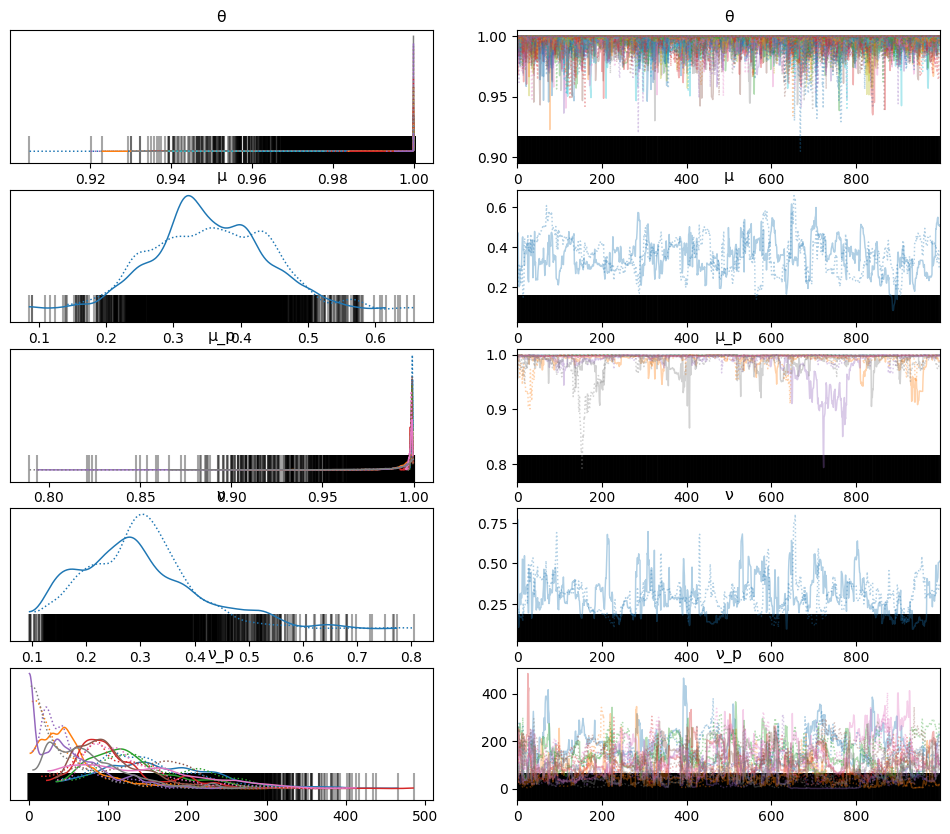

In [22]:
az.plot_trace(idata_sccr)